# 8 Analysis and visualizations

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [PII Check](#paragraph1)
3. [Regional segmentation](#paragraph2)
4. [Low-activity customers ](#paragraph3)
5. [Customer profiling](#paragraph4)
    1. [Criteria](#subparagraph1)
        2. [Age groups](#subsubparagraph1)
        3. [Income groups](#subsubparagraph2)
        4. [Number of dependants](#subsubparagraph3)
        5. [Relationship status](#subsubparagraph4)
        6. [Goods](#subsubparagraph5)
    2. [Setup profiles](#subparagraph2)
6. [Customer profile frequency and expenditure](#paragraph6)
7. [Customer profiles by regions](#paragraph7)
8. [Chart visualisations](#paragraph8)
9. [Visualizations export](#paragraph9)
10. [Data export](#paragraph9)

### 1. Importing Libraries & Data <a name="imports"></a>

In [1]:
# Importing pandas, numpy, os, matplotlib, seaborn & scipy libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turning project folder path into a string
path = r'C:\Users\deuts\Desktop\Instacart Basket Analysis'

In [3]:
# Importing 'df_instacart.pkl' as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_instacart.pkl'))

### 2. PII Check <a name="paragraph1"></a>

In [4]:
# Checking columns by name for possible privacy issues
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'purchase_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'relationship_status', 'income'],
      dtype='object')

In [5]:
# Checking for possible privacy issues
pd.set_option('display.max_columns', None)
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,purchase_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependants,relationship_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [ ]:
# Excludiding columns 'first_name' and 'last_name' since it could give conclusions about the customers identity
df.drop(['first_name', 'last_name'],inplace=True, axis=1)
df.head()

### 3. Regional segmentation <a name="paragraph2"></a>

In [5]:
# Creating list of states in Northeast region
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']

In [6]:
# Creating list of states in Midwest region
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

In [7]:
# Creating list of states in south region
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [8]:
# Creating list of states in west region
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [9]:
# Creating loop for region column
result=[]
for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [10]:
# Adding column to data frame
df['region'] = result

In [11]:
# Displaying result by counting entries of 'region' column
df['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [12]:
# Descriptive statistics by region
df.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
South      7.794918  1.0  25.0
West       7.790355  1.0  25.0

#### All US regions have more or less the same mean and they all have the same minimum and maximum prices.

In [13]:
# Creating crosstab between region and spending
xtab_1 = pd.crosstab(df['region'],df['spending_flag'], normalize='index')
xtab_1

spending_flag,High Spender,Low Spender
region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


#### There isn't a noticeable different regarding spending habits by US regions, as in all four regions the majority of customers are 'low spender'.

### 4. Low-activity customers <a name="paragraph3"></a>

In [14]:
# Creating new column for number of orders per user by counting orders per user_id
df['total_orders'] = df.groupby(['user_id']).user_id.transform('count')

In [16]:
# Creating activity flag
df.loc[df['total_orders'] < 5, 'activity_flag'] = 'low activity'
df.loc[df['total_orders'] >= 5, 'activity_flag'] = 'regular activity'

In [17]:
# Displaying outpot to check new activity flag
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,purchase_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependants,relationship_status,income,region,total_orders,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity


In [18]:
# Counting entries for activity flag
df['activity_flag'].value_counts(dropna=False)

regular activity    32401975
low activity            2884
Name: activity_flag, dtype: int64

#### There are 2884 low activity users in the data frame.

In [ ]:
# Creating a subset of low activity customer entries
low_activity_customers = df[df['activity_flag'] == 'low activity']

In [21]:
low_activity_customers.shape

(2884, 34)

In [22]:
# Exporting subset of low activity customer entries
low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_low_activity_customers.pkl'))

In [22]:
# Excluding low activity customer entries from data frame and checking output
df.drop(df[df['activity_flag'] == 'low activity'].index, inplace = True)

In [ ]:
df['activity_flag'].value_counts()

In [23]:
# Checking data frame
pd.set_option('display.max_columns', None)
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,purchase_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependants,relationship_status,income,region,total_orders,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,59,regular activity


### 5. Customer profiling <a name="paragraph4"></a>

### 5.1 Criteria <a name="subparagraph1"></a>

### 5.1.1 Age groups<a name="subsubparagraph1"></a>

In [15]:
# Creating age groups for age of customers -> 18-24 '0', 25-64 '1' and 65 and older '2'
df.loc[df['age'] <= 24 , 'age_group'] = 'Young adult'
df.loc[(df['age'] >= 25) & (df['age'] < 64), 'age_group'] = 'Adult'
df.loc[df['age'] >= 65, 'age_group'] = 'Senior'

In [16]:
df['age_group'].value_counts()

Adult          19728765
Senior          8575084
Young adult     3573001
Name: age_group, dtype: int64

### 5.1.2 Income groups <a name="subsubparagraph2"></a>

In [17]:
# Creating income groups based on https://www.pewresearch.org/fact-tank/2020/07/23/are-you-in-the-american-middle-class/
# -> Low income < $52,200
# -> Middle income $52,200 - $156,600
# -> Upper income > $156,600
df.loc[(df['income'] < 52000), 'income_group'] = 'Low income'
df.loc[(df['income'] >= 52000) & (df['income'] < 156600), 'income_group'] = 'Middle income'
df.loc[(df['income'] >= 156600), 'income_group'] = 'Upper income'

In [18]:
df['income_group'].value_counts()

Middle income    25687633
Low income        3879453
Upper income      2837773
Name: income_group, dtype: int64

### 5.1.3 Number of dependants <a name="subsubparagraph3"></a>

In [19]:
df.loc[(df['no_of_dependants'] == 0), 'familiy_status'] = 'No parent'
df.loc[(df['no_of_dependants'] == 1), 'familiy_status'] = 'Parent'
df.loc[(df['no_of_dependants'] == 2), 'familiy_status'] = 'Parent'
df.loc[(df['no_of_dependants'] == 3), 'familiy_status'] = 'Parent'

In [20]:
df['familiy_status'].value_counts()

Parent       24307356
No parent     8097503
Name: familiy_status, dtype: int64

### 5.1.4 Relationship status<a name="subsubparagraph4"></a>

In [21]:
df.loc[(df['relationship_status'] == 'married'), 'relationship_category'] = 'Relationship'
df.loc[(df['relationship_status'] == 'single'), 'relationship_category'] = 'Single'
df.loc[(df['relationship_status'] == 'divorced/widowed'), 'relationship_category'] = 'Single'
df.loc[(df['relationship_status'] == 'living with parents and siblings'), 'relationship_category'] = 'Relationship'

In [22]:
df['relationship_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: relationship_status, dtype: int64

### 5.1.5 Goods<a name="subsubparagraph5"></a>

In [23]:
# Creating naming column for goods by department id 'goods'
df.loc[(df['department_id'] == 1), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 2), 'goods_category'] = 'Other'
df.loc[(df['department_id'] == 3), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 4), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 5), 'goods_category'] = 'Alcohol'
df.loc[(df['department_id'] == 6), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 7), 'goods_category'] = 'Beverages'
df.loc[(df['department_id'] == 8), 'goods_category'] = 'Pets'
df.loc[(df['department_id'] == 9), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 10), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 11), 'goods_category'] = 'Personal care'
df.loc[(df['department_id'] == 12), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 13), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 14), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 15), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 16), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 17), 'goods_category'] = 'Household'
df.loc[(df['department_id'] == 18), 'goods_category'] = 'Babies'
df.loc[(df['department_id'] == 19), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 20), 'goods_category'] = 'Food'
df.loc[(df['department_id'] == 21), 'goods_category'] = 'Missing'

In [24]:
df['goods_category'].value_counts()

Food             27749848
Beverages         2688123
Household          738666
Personal care      447572
Babies             423802
Alcohol            153696
Pets                97716
Missing             69145
Other               36291
Name: goods_category, dtype: int64

### 5.2 Setup profiles <a name="subparagraph2"></a>

In [25]:
df.loc[(df['age_group'] == 'Young adult') 
       & (df['familiy_status'] == 'Parent'), 'customer_profile'] = 'Young parent'

In [26]:
df.loc[(df['age_group'] == 'Adult') 
       & (df['familiy_status'] == 'Parent'), 'customer_profile'] = 'Adult parent'

In [27]:
df.loc[(df['age_group'] == 'Adult')
       & (df['goods_category'] == 'Pets')
           & (df['familiy_status'] == 'Parent'), 'customer_profile'] = 'Adult parent with pet'

In [28]:
df.loc[(df['age_group'] == 'Senior')
       & (df['income_group'] == 'Low income'), 'customer_profile'] = 'Senior low income'

In [29]:
df.loc[(df['age_group'] == 'Senior')
       & (df['income_group'] == 'Upper income'), 'customer_profile'] = 'Senior upper income'

In [30]:
df['customer_profile'].value_counts()

Adult parent             14711774
Young parent              2709423
Senior upper income       1119741
Senior low income          778226
Adult parent with pet       43647
Name: customer_profile, dtype: int64

### 6. Customer profile frequency and expenditure <a name="paragraph6"></a> 

In [57]:
# Aggregating descriptive statistics on prices by customer profile
freqt_1 = df.groupby('customer_profile').agg({'purchase_frequency': ['mean']})

In [44]:
# Aggregating descriptive statistics  on purchase freq by customer profile
freqt_2 = df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [40]:
# Aggregating descriptive statistics on goods category
xtab_0 = pd.crosstab(df['goods_category'],df['customer_profile'], normalize='index')

In [84]:
# Aggregating descriptive statistics  on purchase freq by customer profile
xtab_5 = pd.crosstab(df['customer_profile'], df['spending_flag'], dropna = False, normalize='index')

### 7. Customer profiles by regions <a name="paragraph7"></a>

In [52]:
# Creating crosstab on customer profile and region and displaying it
customer_profile_region = pd.crosstab(df['region'], df['customer_profile'], dropna = False, normalize='index')
customer_profile_region

customer_profile,Adult parent,Adult parent with pet,Senior low income,Senior upper income,Young parent
region,,,,,
Midwest,0.763430,0.002090,0.038962,0.054711,0.140808
Northeast,0.759390,0.002340,0.042253,0.057670,0.138347
South,0.756435,0.002205,0.039774,0.059911,0.141676
West,0.761148,0.002409,0.040437,0.058067,0.137939


#### There are a higher percentage of young parents in the Northeast and a higher number of single aduls with a pet in the Midwest.

In [40]:
# Creating crosstab on customer profile and department and displaying it
customer_profile_department = pd.crosstab(df['goods_category'], df['customer_profile'], dropna = False, normalize='index')
customer_profile_department

customer_profile,Married senior with pet,Single adult with pet,Young parent
goods_category,,,
Babies,0.000000,0.000000,1.0
Pets,0.475689,0.524311,0.0


#### As expected customers without pets or children wont buy in the pets and babies products.

### 8. Chart visualisations <a name="paragraph8"></a>

In [ ]:
# Creating bar chart
bar_1 = df['region'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per region")
plt.xlabel("Region")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_2 = df['loyalty_flag'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per customer type")
plt.xlabel("Customer type")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_3 = df['age_group'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per age group")
plt.xlabel("Age group")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_4 = df['income_group'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per income group")
plt.xlabel("Income group")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_5 = df['familiy_status'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per family_status")
plt.xlabel("Family status")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_6 = df['relationship_status'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per relationship_status")
plt.xlabel("Relationship status")
plt.ylabel("Orders in millions")

In [ ]:
# Creating bar chart
bar_7 = df['goods_category'].value_counts().plot.bar(figsize=(5,10))
plt.title("Orders per goods_category")
plt.xlabel("Goods category")
plt.ylabel("Orders in millions")

In [ ]:
xtab_2 = pd.crosstab(df['region'], df['frequency_flag'], normalize='index')
bar_8 = xtab_2.plot(kind = 'bar', stacked = True,figsize=(5,10))

In [ ]:
xtab_3 = pd.crosstab(df['region'], df['spending_flag'], dropna = False, normalize='index')
bar_9 = xtab_3.plot(kind = 'bar', stacked = True,figsize=(5,10))

In [99]:
price_group = []
for value in df['prices']:
    if value > 10:
        price_group.append('high') # high price range 
    elif value <= 10 and value > 5:
        price_group.append('mid') # mid price range
    elif value <= 5:
        price_group.append('low') # low price range
    else:
        price_group.append(np.nan)

In [101]:
df['price_group'] = price_group

In [ ]:
pie_1 = df['price_group'].value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.title("Price groups")

In [104]:
# Creating naming column for department by department id
df.loc[(df['department_id'] == 1), 'department_name'] = 'Frozen'
df.loc[(df['department_id'] == 2), 'department_name'] = 'Other'
df.loc[(df['department_id'] == 3), 'department_name'] = 'Bakery'
df.loc[(df['department_id'] == 4), 'department_name'] = 'Produce'
df.loc[(df['department_id'] == 5), 'department_name'] = 'Alcohol'
df.loc[(df['department_id'] == 6), 'department_name'] = 'International'
df.loc[(df['department_id'] == 7), 'department_name'] = 'Beverages'
df.loc[(df['department_id'] == 8), 'department_name'] = 'Pets'
df.loc[(df['department_id'] == 9), 'department_name'] = 'Dry goods pasta'
df.loc[(df['department_id'] == 10), 'department_name'] = 'Bulk'
df.loc[(df['department_id'] == 11), 'department_name'] = 'Personal care'
df.loc[(df['department_id'] == 12), 'department_name'] = 'Meat seafood'
df.loc[(df['department_id'] == 13), 'department_name'] = 'Pantry'
df.loc[(df['department_id'] == 14), 'department_name'] = 'Breakfast'
df.loc[(df['department_id'] == 15), 'department_name'] = 'Canned goods'
df.loc[(df['department_id'] == 16), 'department_name'] = 'Dairy eggs'
df.loc[(df['department_id'] == 17), 'department_name'] = 'Household'
df.loc[(df['department_id'] == 18), 'department_name'] = 'Babies'
df.loc[(df['department_id'] == 19), 'department_name'] = 'Snacks'
df.loc[(df['department_id'] == 20), 'department_name'] = 'Deli'
df.loc[(df['department_id'] == 21), 'department_name'] = 'Missing'

In [ ]:
bar_10 = df.department_name.value_counts().sort_values(ascending = True).plot.barh(figsize=(10,10))
plt.title("Orders per department")
plt.xlabel("Orders in millions")
plt.ylabel("Department")

In [ ]:
# Creating a pie chart for 'loyalty_flag' and sorting it by index and coloring its bars
pie_2 = df['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.title("Customer Loyalty")

In [ ]:
xtab_4 = pd.crosstab(df['loyalty_flag'], df['spending_flag'], dropna = False, normalize='index')
bar_11 = xtab_4.plot(kind = 'bar', stacked = True,figsize=(5,10))

In [ ]:
xtab_5 = pd.crosstab(df['loyalty_flag'], df['frequency_flag'], dropna = False, normalize='index')
bar_12 = xtab_5.plot(kind = 'bar', stacked = True,figsize=(5,10))

Text(0, 0.5, 'Customer type')

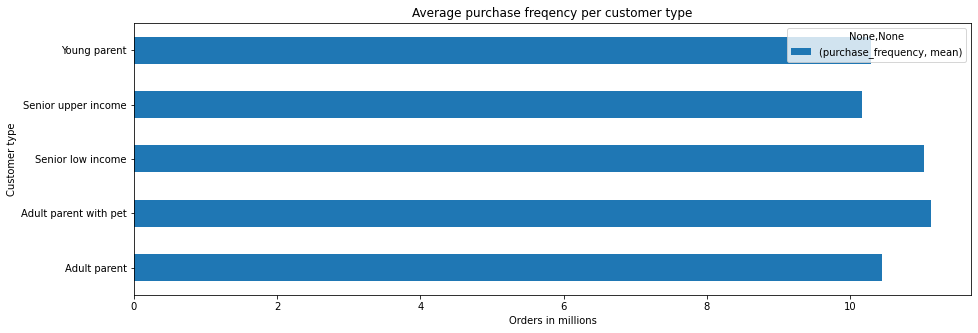

In [107]:
bar_13 = freqt_1.plot(kind = 'barh', stacked = True,figsize=(15,5))
plt.title("Average purchase freqency per customer type")
plt.xlabel("Orders in millions")
plt.ylabel("Customer type")

Text(0, 0.5, 'Orders in millions')

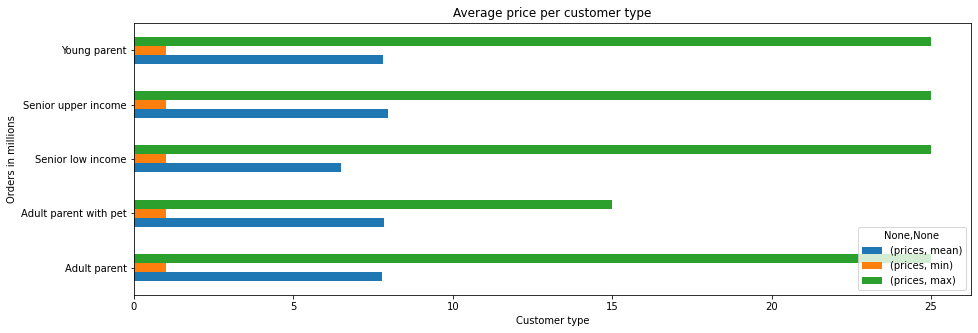

In [108]:
bar_14 = freqt_2.plot(kind = 'barh',figsize=(15,5))
plt.title("Average price per customer type")
plt.xlabel("Customer type")
plt.ylabel("Orders in millions")

Text(0, 0.5, 'Goods')

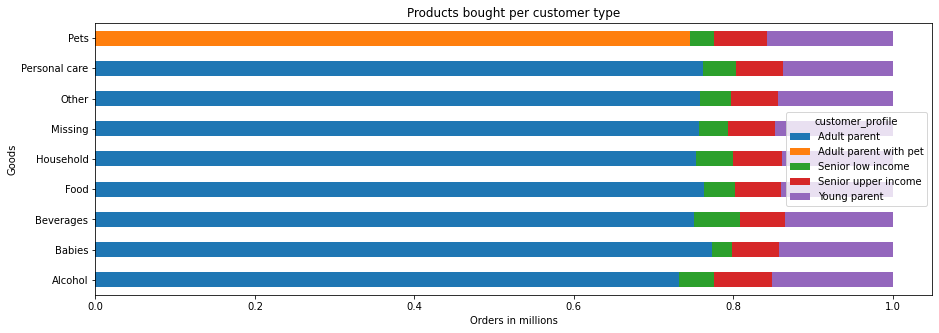

In [109]:
bar_15 = xtab_0.plot(kind = 'barh', stacked = True,figsize=(15,5))
plt.title("Products bought per customer type")
plt.xlabel("Orders in millions")
plt.ylabel("Goods")

Text(0, 0.5, 'Customer type')

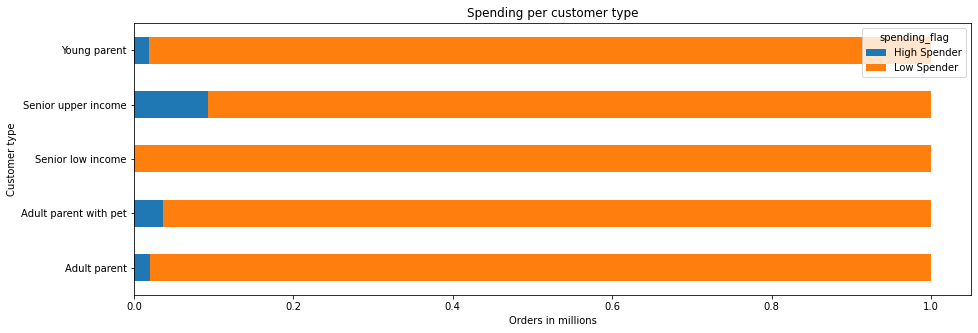

In [110]:
bar_16 = xtab_5.plot(kind = 'barh',stacked = True,figsize=(15,5))
plt.title("Spending per customer type")
plt.xlabel("Orders in millions")
plt.ylabel("Customer type")

### 9. Visualisations export <a name="paragraph9"></a> 

In [53]:
# Exporting charts
bar_0.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_0_orders_region_f.png'))

In [ ]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1_orders_region_f.png'))

In [ ]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2_orders_customer_type_f.png'))

In [ ]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_3_orders_age_group_f.png'))

In [ ]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_4_orders_income_group_f.png'))

In [ ]:
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_5_orders_family_status_f.png'))

In [ ]:
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_6_orders_relationship_status_f.png'))

In [ ]:
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_7_orders_goods_category_f.png'))

In [ ]:
bar_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_8_region_freq_f.png'))

In [ ]:
bar_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_9_region_spending_f.png'))

In [111]:
pie_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_1_price_groups_f.png'))

In [ ]:
bar_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_10_orders_department_f.png'))

In [112]:
pie_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_2_customer_loyalty_f.png'))

In [ ]:
bar_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_11_loyalty_spending_f.png'))

In [ ]:
bar_12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_12_loyalty_freq_f.png'))

In [111]:
bar_13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_13_customer_type_freq_f.png'))

In [112]:
bar_14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_14_customer_type__prices_f.png'))

In [113]:
bar_15.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_15_customer_type_products_f.png'))

In [114]:
bar_16.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_16_customer_type_spender_freq_f.png'))

### 10. Data export <a name="paragraph10"></a> 

In [62]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_instacart_final.pkl'))